# 毕业论文`GRAD`
## MEIC柱状图

---
*@author: Evan*\
*@date: 2023-12-22*

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
xlspath = meicdata + 'excel/'

years = np.arange(2014,2021)
vars = ['SO2','NOx','CO','VOC','NH3','PM10','PM25','BC','OC']

In [3]:
df = {}
for var in vars:
    dfs = {}
    for year in tqdm(years,desc=f'{var}'):
        dfs[year] = pd.read_excel(xlspath + f'{year}.xlsx',
                                  sheet_name=var)
    df[var] = pd.concat(dfs,axis=0)
    df[var].set_index('year',inplace=True)
    df[var].drop(columns=['month','sector'],inplace=True)


OC: 100%|██████████| 7/7 [00:00<00:00, 36.18it/s]


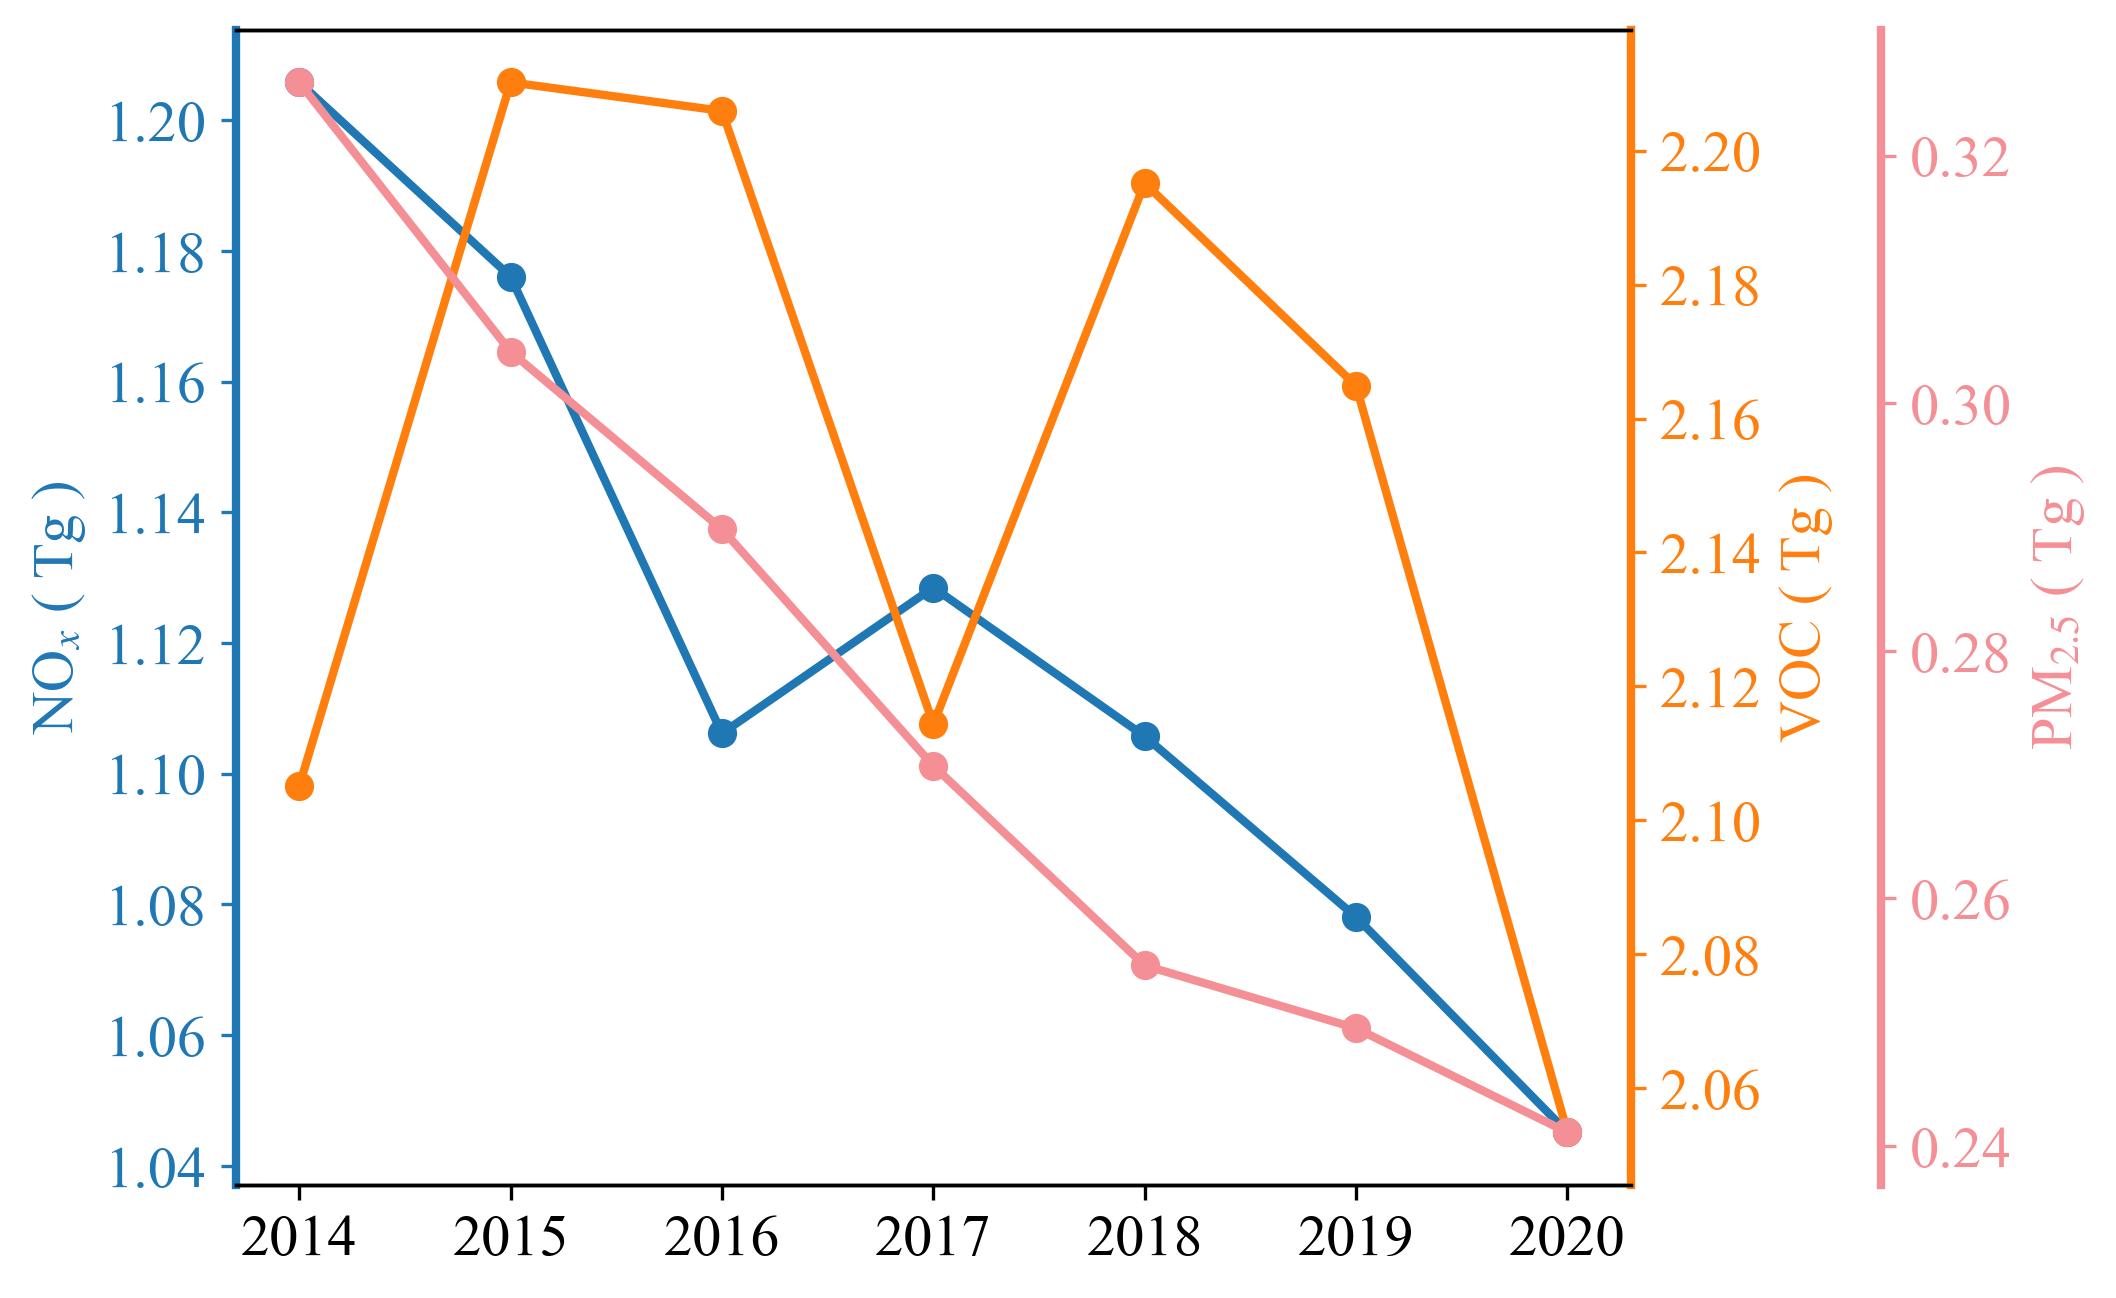

In [98]:
NOx  = df['NOx']['Guangdong'].values / 10**6
VOC  = df['VOC']['Guangdong'].values / 10**6
PM25 = df['PM25']['Guangdong'].values / 10**6

linedict = dict(
    linewidth=2,
    marker='o',
    markersize=6,
)

fig = plt.figure(figsize=(6,5),dpi=300)
ax1 = fig.subplots(1,1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.plot(years,NOx,label='NO$_x$',color='tab:blue',**linedict)
ax2.plot(years,VOC,label='VOC',color='tab:orange',**linedict)
ax3.plot(years,PM25,label='PM$_{2.5}$',color='#f58f96',**linedict)

ax1.set_ylabel('NO$_x$ ( Tg )',color='tab:blue',fontsize=14)
ax2.set_ylabel('VOC ( Tg )',color='tab:orange',fontsize=14)
ax3.set_ylabel('PM$_{2.5}$ ( Tg )',color='#f58f96',fontsize=14)

# set spines and ticks
ax1.spines['left'].set_color('tab:blue')
ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='x',colors='k',labelsize=14)
ax1.tick_params(axis='y',colors='tab:blue',labelsize=14)

ax2.spines['right'].set_color('tab:orange')
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y',colors='tab:orange',labelsize=14)

ax3.spines['right'].set_position(('outward', 60))
ax3.spines['right'].set_color('#f58f96')
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_linewidth(2)
ax3.tick_params(axis='y',colors='#f58f96',labelsize=14)

# ax1.set_xlim(2014,2020)
plt.show()

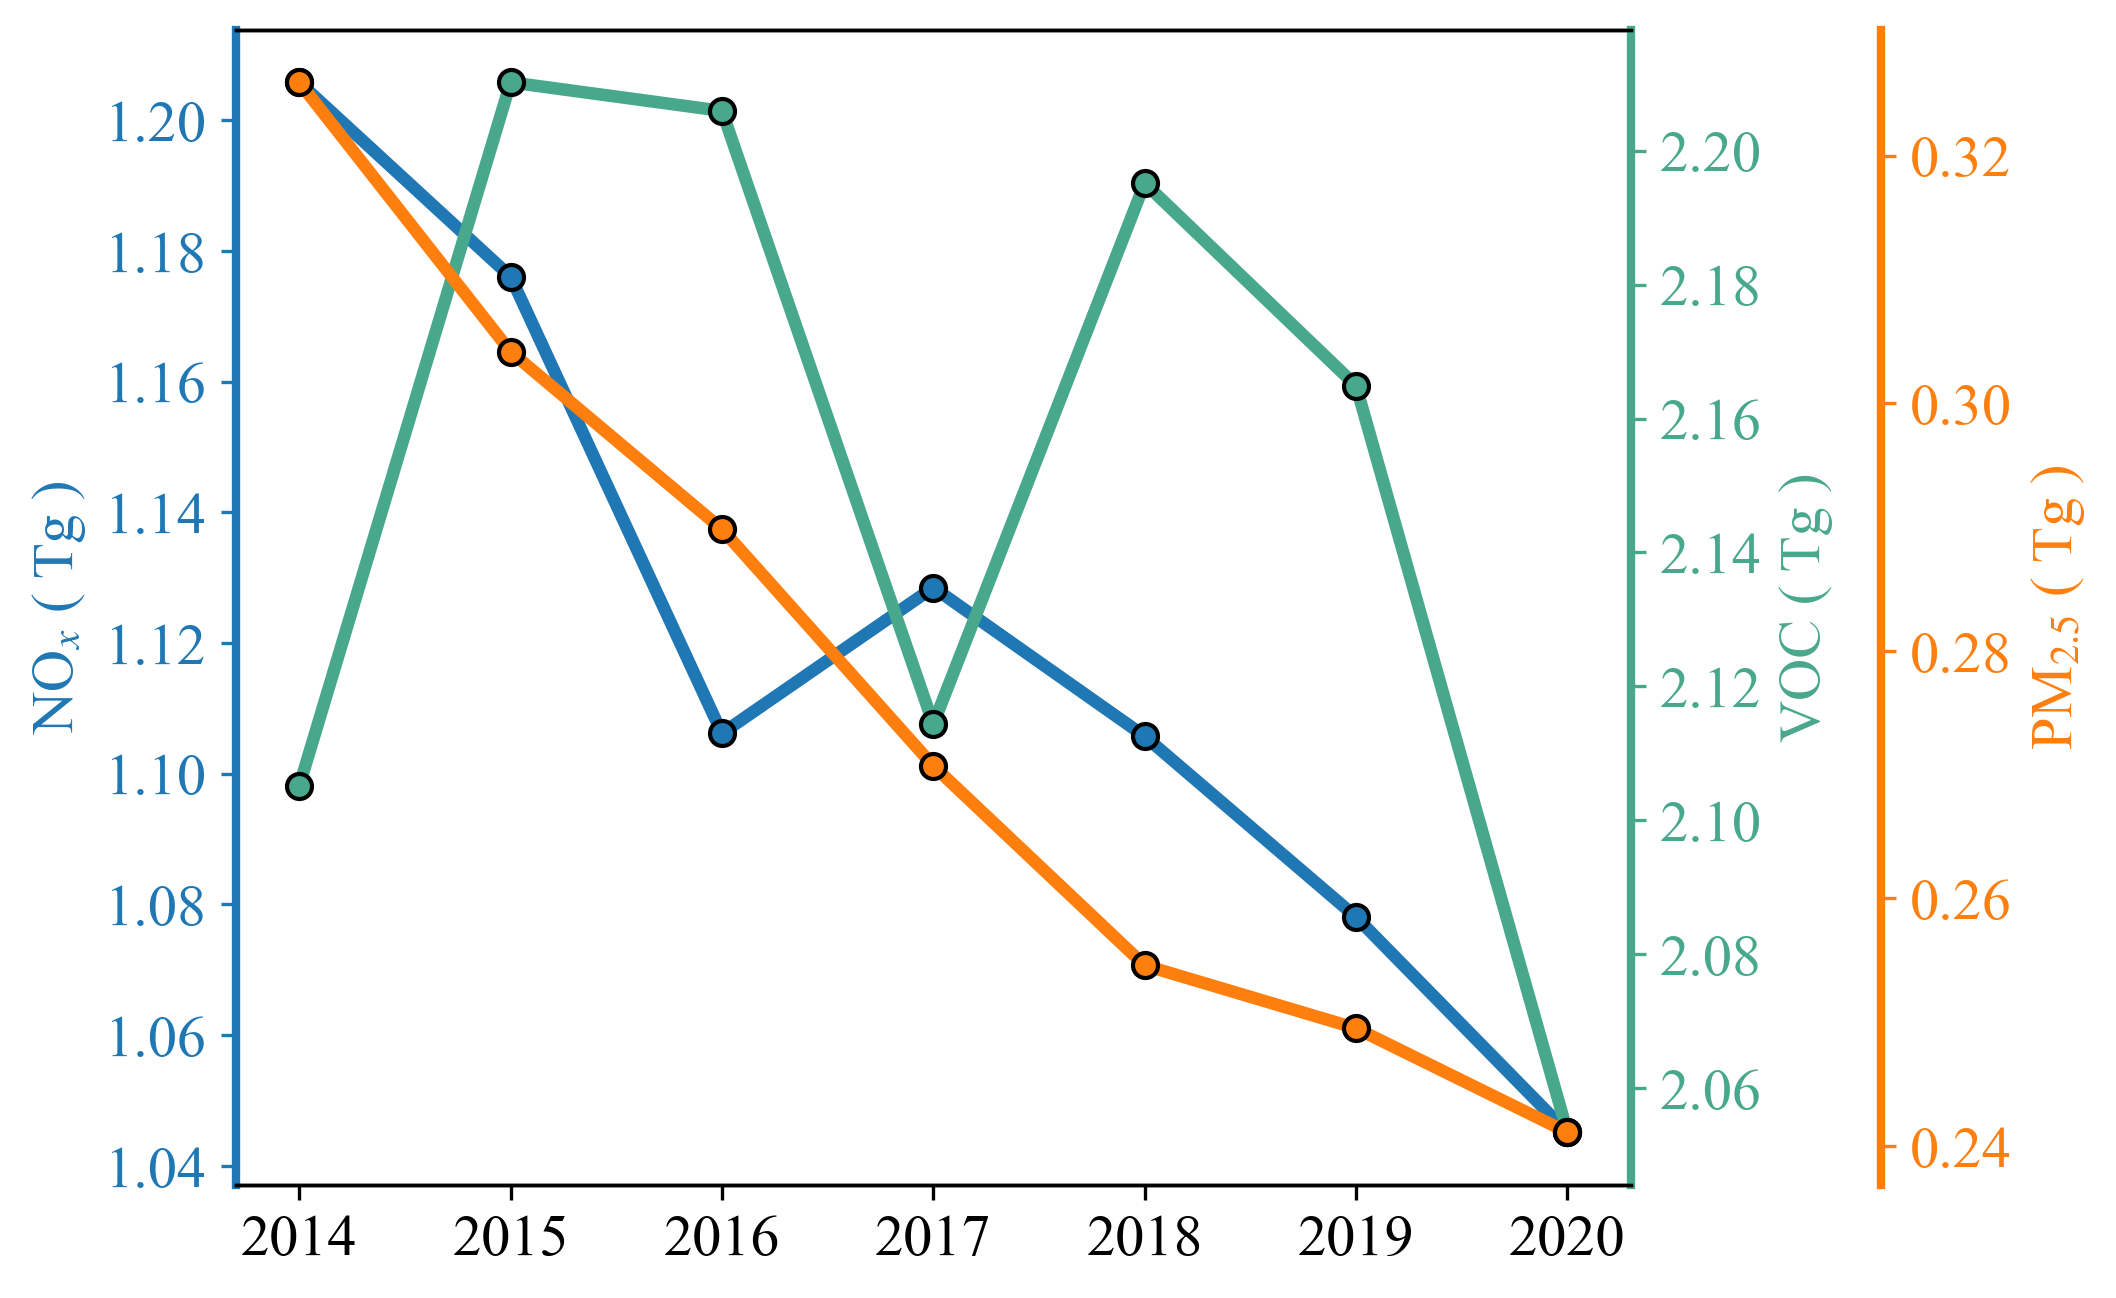

In [9]:
NOx  = df['NOx']['Guangdong'].values / 10**6
VOC  = df['VOC']['Guangdong'].values / 10**6
PM25 = df['PM25']['Guangdong'].values / 10**6

linedict = dict(
    linewidth=3,
    marker='o',
    markersize=6,
    markeredgecolor='k',
)

fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
axes = [ax1, ax1.twinx(), ax1.twinx()]

data = [NOx, VOC, PM25]
colors = ['tab:blue', '#48a88c', 'tab:orange']
labels = ['NO$_x$', 'VOC', 'PM$_{2.5}$']

for ax, d, color, label in zip(axes, data, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axes)):
    axes[i].spines['right'].set_color(colors[i])
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_linewidth(2)

axes[0].spines['left'].set_color(colors[0])
axes[0].spines['left'].set_linewidth(2)
axes[2].spines['right'].set_position(('outward', 60))

plt.show()

In [7]:
NOx  = df['NOx']['Guangdong'].values / 10**6
print('NOx:',NOx[0],NOx[-2],NOx[-2]-NOx[0],(NOx[-2]-NOx[0])/NOx[0]*100)
VOC  = df['VOC']['Guangdong'].values / 10**6
print('VOC:',VOC[0],VOC[-2],VOC[-2]-VOC[0],(VOC[-2]-VOC[0])/VOC[0]*100)
PM25  = df['PM25']['Guangdong'].values / 10**6
print('PM25:',PM25[0],PM25[-2],PM25[-2]-PM25[0],(PM25[-2]-PM25[0])/PM25[0]*100)

NOx: 1.20583426 1.078079617 -0.12775464300000006 -10.594710006000332
VOC: 2.1051177859999997 2.164893042 0.05977525600000044 2.8395207335918853
PM25: 0.325937779 0.249512157 -0.07642562199999997 -23.44791764688314
